In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

EXERCISE 1. 
The hourly wages in a particular industry are normally distributed with mean $13.20 and standard deviation $2.50. A company in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)

CHECK: statistic: -2.5298221281347035, pvalue= 0.005706018193000826

In [43]:
xbar=12.20
s=2.50
z_test = (xbar - 13.20)/(s/np.sqrt(40))
z_test

-2.5298221281347035

In [44]:
pval=stats.norm.cdf(z_test)
pval

0.005706018193000826

In [45]:
alpha = 0.01

if pval < alpha:
    print("Reject the null")
else:
    print("Fail to reject the null")

Reject the null


EXERCISE 2.
Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

In [49]:
df=pd.read_csv("soil - Sheet1.csv")
df.head()

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371


In [52]:
Ttest1=stats.ttest_ind(df.Soil1,df.Soil2,nan_policy="omit")

In [53]:
Ttest1.pvalue

2.5932287323528147e-06

In [54]:
Ttest1.statistic

5.1681473319343345

In [56]:
alpha = 0.01

if Ttest1.pvalue < alpha:
    print("Reject the null")
else:
    print("Fail to reject the null")

Reject the null


EXERCISE 3. The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset

Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).


In [62]:
df1=pd.read_csv("2015 PISA Test - Sheet1.csv")
df1.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375


In [63]:
df1.describe()

,internet_users_per_100,Math,Reading,Science
count,70.000000,70.000000,70.000000,70.000000
mean,71.973099,460.971557,460.997291,465.439093
std,16.390632,53.327205,49.502679,48.397254
min,21.976068,327.702000,346.549000,331.638800
25%,60.899020,417.416075,426.948625,425.923375
50%,72.999350,477.607150,480.199850,475.400050
75%,85.026763,500.482925,499.687475,502.431250
max,98.200000,564.189700,535.100200,555.574700


In [65]:
df1.Continent_Code.value_counts()

EU    37
AS    17
SA     7
OC     2
AF     2
Name: Continent_Code, dtype: int64

In [67]:
df1.Continent_Code.unique()

array(['EU', 'AS', 'SA', 'OC', nan, 'AF'], dtype=object)

In [72]:
df1.fillna(value="NA",inplace=True)

In [74]:
df1.Continent_Code.unique()

array(['EU', 'AS', 'SA', 'OC', 'NA', 'AF'], dtype=object)

In [81]:
for cont,shape in zip([df1[df1.Continent_Code==k].shape for k in df1.Continent_Code.unique()],list(df1.Continent_Code.unique())):print(f"{cont} --> {shape}")

(37, 6) --> EU
(17, 6) --> AS
(7, 6) --> SA
(2, 6) --> OC
(5, 6) --> NA
(2, 6) --> AF


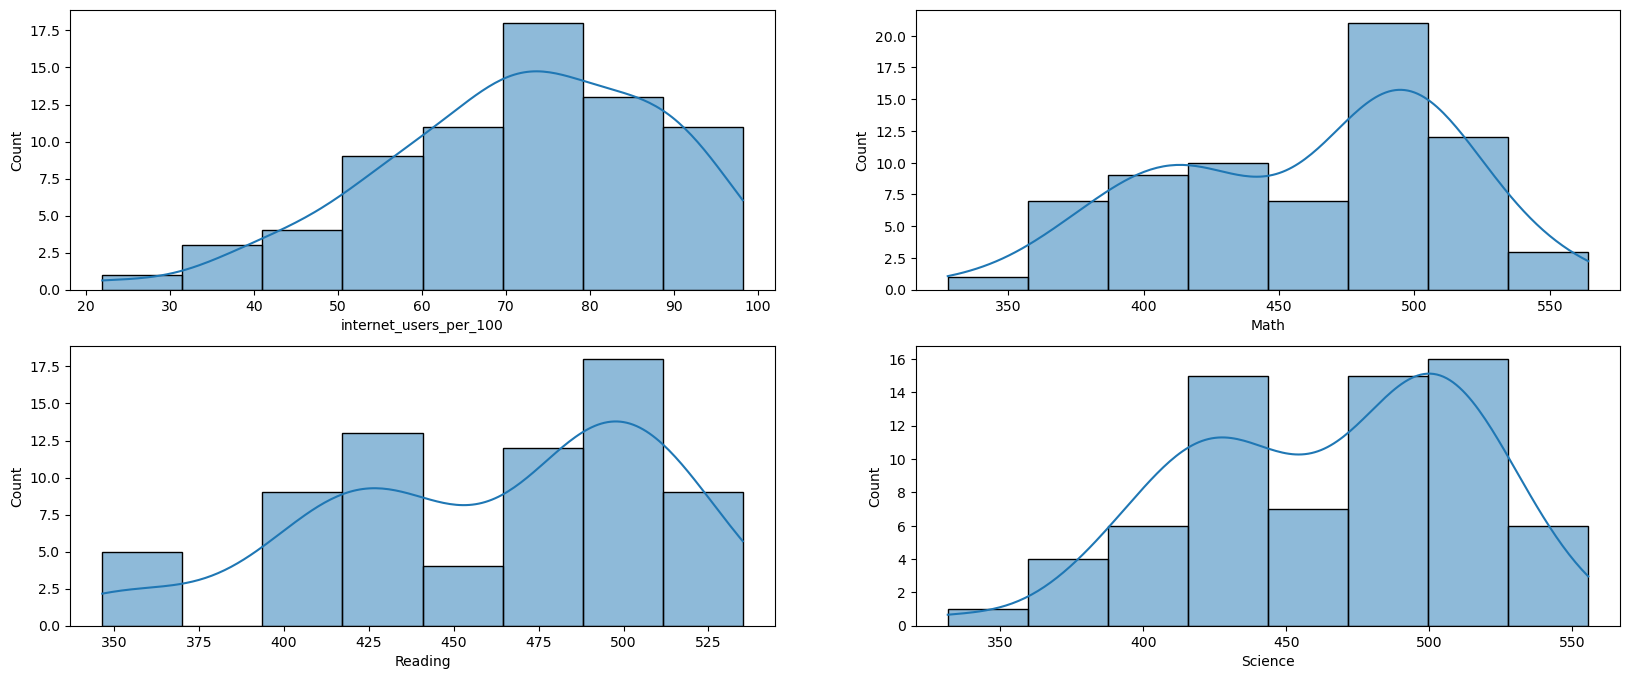

In [86]:
fig, axes = plt.subplots(2,2, figsize=(20,8))

sns.histplot(df1['internet_users_per_100'], kde=True, ax=axes[0,0])
sns.histplot(df1['Math'], kde=True, ax=axes[0,1])
sns.histplot(df1['Reading'], kde=True, ax=axes[1,0])
sns.histplot(df1['Science'], kde=True, ax=axes[1,1]);
plt.show()

# EU SCORES

In [88]:
df1_EU = df1[df1["Continent_Code"]=="EU"]
df1_EU.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
4,AUT,EU,83.940142,496.7423,484.8656,495.0375
5,BEL,EU,85.052900,506.9844,498.5242,501.9997
6,BGR,EU,56.656300,441.1899,431.7175,445.7720
9,CHE,EU,87.479056,521.2506,492.1982,505.5058


In [89]:
df1_EU.describe()

,internet_users_per_100,Math,Reading,Science
count,37.000000,37.000000,37.000000,37.000000
mean,77.274888,477.981449,476.164608,478.299381
std,12.425773,35.150403,37.720545,34.450616
min,53.744979,371.311400,351.741500,383.682400
25%,68.632900,464.040100,452.514300,460.774900
50%,76.184000,489.728700,487.250100,490.225000
75%,87.479056,503.722000,499.814600,501.936900
max,98.200000,521.250600,526.424700,534.193700


In [90]:
df1_EU.var()

internet_users_per_100     154.399841
Math                      1235.550805
Reading                   1422.839540
Science                   1186.844969
dtype: float64

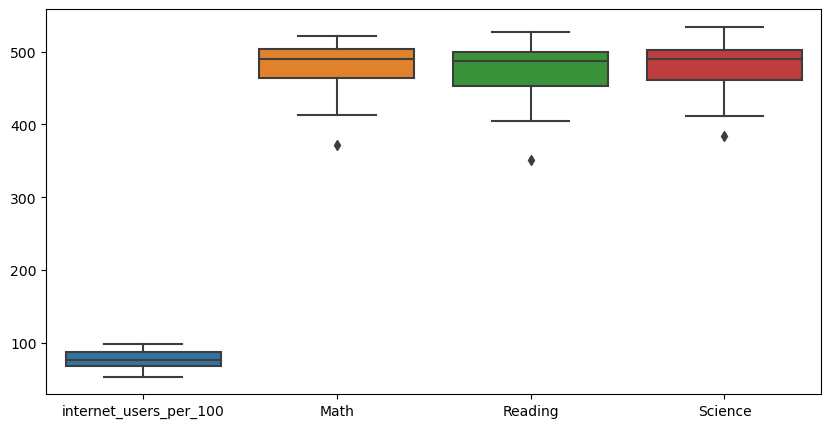

In [91]:
fig = plt.subplots(figsize=(10, 5))
sns.boxplot(data=df1_EU)
plt.show()

# AS SCORES

In [92]:
df_AS = df1[df1["Continent_Code"]=="AS"]
df_AS.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
11,CHN,AS,50.300000,531.2961,493.9412,517.7793
25,GEO,AS,47.569760,403.8332,401.2881,411.1315
27,HKG,AS,84.948353,547.9310,526.6753,523.2774
30,IDN,AS,21.976068,386.1096,397.2595,403.0997


In [93]:
df_AS.describe()

,internet_users_per_100,Math,Reading,Science
count,17.000000,17.000000,17.000000,17.000000
mean,68.455613,466.216647,454.059682,467.945847
std,21.086060,64.356490,57.048962,56.671371
min,21.976068,380.259000,346.549000,386.485400
25%,50.300000,403.833200,408.102200,417.611200
50%,74.000000,459.816000,433.542300,456.483600
75%,84.948353,531.296100,508.690500,523.277400
max,92.884826,564.189700,535.100200,555.574700


In [94]:
df_AS.var()

internet_users_per_100     444.621918
Math                      4141.757822
Reading                   3254.584049
Science                   3211.644321
dtype: float64

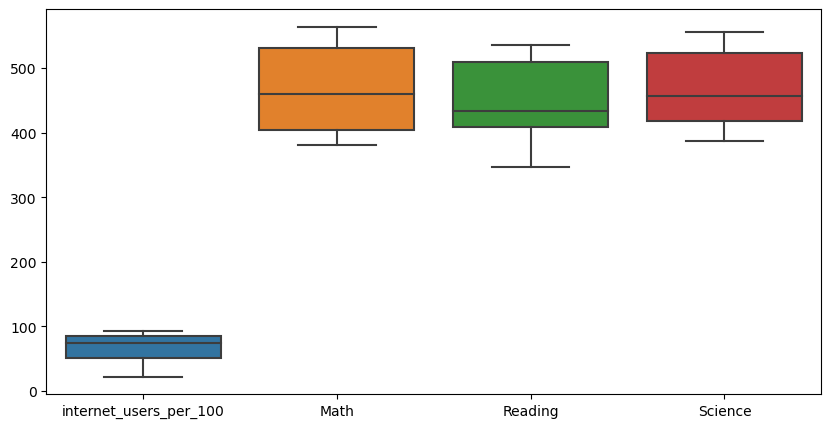

In [97]:
fig = plt.subplots(figsize=(10, 5))
sns.boxplot(data=df_AS)
plt.show()

Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.
CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345

In [99]:
ind_Test=stats.ttest_ind(df1_EU.Math, df_AS.Math, nan_policy="omit")

(ind_Test.statistic,ind_Test.pvalue)

(0.870055317967983, 0.38826888111307345)

  Level of significance is tα/2 = 0.05/2 = 0.025

In [100]:
alpha=0.025
if ind_Test.pvalue < alpha:
    print("Reject the Null")
else:
    print("Fail to reject")

Fail to reject


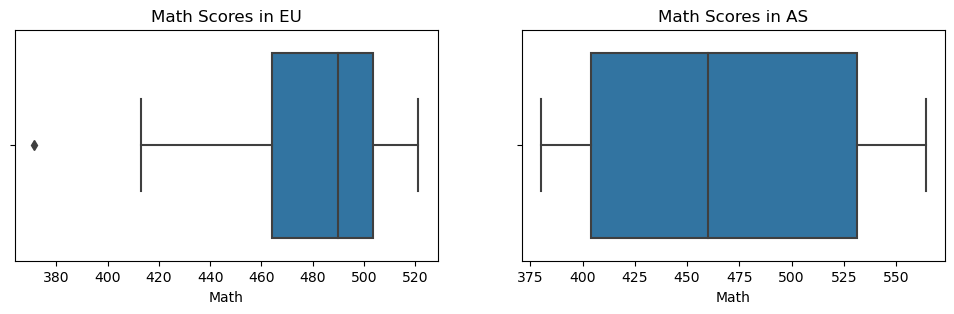

In [101]:
fig, axes = plt.subplots(1,2, figsize=(12,3))

sns.boxplot(df1_EU['Math'], ax=axes[0]).set(title='Math Scores in EU')
sns.boxplot(df_AS['Math'], ax=axes[1]).set(title='Math Scores in AS')
plt.show()